# Module 4: Advanced Pandas Operations

Master powerful data analysis techniques that go beyond basic filtering and selection.

## Learning Objectives
- Use GroupBy for aggregations
- Merge and join multiple datasets
- Create pivot tables
- Reshape data with melt, stack, and unstack
- Understand different types of joins

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded!")

Libraries loaded!


In [3]:
# Load datasets
df_sales = pd.read_csv('../datasets/sales_data.csv', parse_dates=['date'])
df_customers = pd.read_csv('../datasets/customer_data.csv', parse_dates=['signup_date'])
df_products = pd.read_csv('../datasets/product_catalog.csv')

print("Datasets loaded successfully!")
print(f"Sales records: {len(df_sales)}")
print(f"Customers: {len(df_customers)}")
print(f"Products: {len(df_products)}")

Datasets loaded successfully!
Sales records: 1000
Customers: 200
Products: 46


## 1. GroupBy - The Split-Apply-Combine Pattern

GroupBy is one of the most powerful operations in Pandas. It's like Pivot Tables in Excel.

In [10]:
# Simple groupby: Total sales by region
region_totals = df_sales.groupby('region')['total_amount'].sum()
print("Total sales by region:")
print(region_totals)
print(f"\nType: {type(region_totals)}")

Total sales by region:
region
Central    264570.70
East       242503.34
North      265889.05
South      212533.51
West       261290.44
Name: total_amount, dtype: float64

Type: <class 'pandas.core.series.Series'>


In [11]:
# Multiple aggregations at once
region_stats = df_sales.groupby('region')['total_amount'].agg(['sum', 'mean', 'count', 'min', 'max'])
print("Regional sales statistics:")
print(region_stats)

Regional sales statistics:
               sum         mean  count    min      max
region                                                
Central  264570.70  1316.272139    201  32.74  4445.64
East     242503.34  1188.741863    204  39.53  4272.66
North    265889.05  1290.723544    206  37.97  4393.53
South    212533.51  1214.477200    175  12.82  4059.09
West     261290.44  1220.983364    214  40.52  4445.82


In [6]:
# Custom column names for aggregations
region_analysis = df_sales.groupby('region')['total_amount'].agg([
    ('Total_Sales', 'sum'),
    ('Average_Sale', 'mean'),
    ('Number_of_Transactions', 'count'),
    ('Min_Sale', 'min'),
    ('Max_Sale', 'max')
]).round(2)

print(region_analysis)

         Total_Sales  Average_Sale  Number_of_Transactions  Min_Sale  Max_Sale
region                                                                        
Central    264570.70       1316.27                     201     32.74   4445.64
East       242503.34       1188.74                     204     39.53   4272.66
North      265889.05       1290.72                     206     37.97   4393.53
South      212533.51       1214.48                     175     12.82   4059.09
West       261290.44       1220.98                     214     40.52   4445.82


In [7]:
# Multiple columns in groupby
rep_region_sales = df_sales.groupby(['region', 'sales_rep'])['total_amount'].sum().reset_index()
print("Sales by region and sales rep:")
print(rep_region_sales.head(20))

Sales by region and sales rep:
     region       sales_rep  total_amount
0   Central       David Lee      23823.43
1   Central  Jennifer Davis      30384.09
2   Central      John Smith      52100.90
3   Central   Lisa Martinez      25888.11
4   Central    Mary Johnson      33805.85
5   Central   Michael Brown      30403.22
6   Central   Robert Garcia      29869.05
7   Central    Sarah Wilson      38296.05
8      East       David Lee      44776.63
9      East  Jennifer Davis      26040.48
10     East      John Smith      23379.63
11     East   Lisa Martinez      22948.70
12     East    Mary Johnson      41527.40
13     East   Michael Brown      23426.33
14     East   Robert Garcia      23997.17
15     East    Sarah Wilson      36407.00
16    North       David Lee      28755.25
17    North  Jennifer Davis      39148.12
18    North      John Smith      41820.79
19    North   Lisa Martinez      31153.84


<Figure size 1200x600 with 0 Axes>

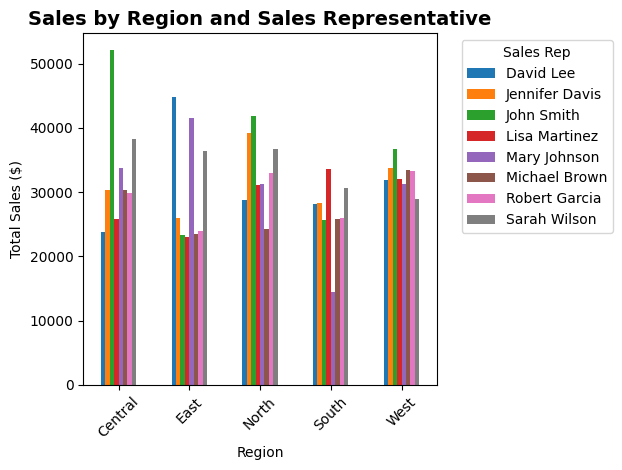

In [8]:
# Visualize groupby results
region_rep_pivot = df_sales.groupby(['region', 'sales_rep'])['total_amount'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
region_rep_pivot.plot(kind='bar', stacked=False)
plt.title('Sales by Region and Sales Representative', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.legend(title='Sales Rep', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Advanced GroupBy Operations

In [12]:
# Group by multiple columns with multiple aggregations
sales_analysis = df_sales.groupby(['region', 'payment_method']).agg({
    'total_amount': ['sum', 'mean', 'count'],
    'quantity': ['sum', 'mean']
}).round(2)

print("Detailed sales analysis:")
print(sales_analysis.head(15))

Detailed sales analysis:
                       total_amount                quantity      
                                sum     mean count      sum  mean
region  payment_method                                           
Central Cash               62454.10  1643.53    38      211  5.55
        Credit Card        95241.71  1236.91    77      360  4.68
        Debit Card         72650.84  1297.34    56      263  4.70
        PayPal             23293.89  1058.81    22      109  4.95
        Wire Transfer      10930.16  1366.27     8       43  5.38
East    Cash               50690.10  1101.96    46      233  5.07
        Credit Card       100587.20  1197.47    84      414  4.93
        Debit Card         58824.01  1251.57    47      226  4.81
        PayPal             24152.57  1420.74    17       74  4.35
        Wire Transfer       8249.46   824.95    10       52  5.20
North   Cash               49698.50  1155.78    43      225  5.23
        Credit Card       100357.88  1454.46    69 

In [13]:
# Using .transform() - keeps original DataFrame shape
df_sales['region_total'] = df_sales.groupby('region')['total_amount'].transform('sum')
df_sales['region_avg'] = df_sales.groupby('region')['total_amount'].transform('mean')
df_sales['pct_of_region_total'] = (df_sales['total_amount'] / df_sales['region_total'] * 100).round(2)

print("Sales with region context:")
print(df_sales[['region', 'total_amount', 'region_total', 'region_avg', 'pct_of_region_total']].head(15))

Sales with region context:
     region  total_amount  region_total   region_avg  pct_of_region_total
0     North        335.10     265889.05  1290.723544                 0.13
1      West         62.76     261290.44  1220.983364                 0.02
2     South       1454.48     212533.51  1214.477200                 0.68
3      West       2982.77     261290.44  1220.983364                 1.14
4   Central        350.57     264570.70  1316.272139                 0.13
5      West       2429.42     261290.44  1220.983364                 0.93
6      East        384.16     242503.34  1188.741863                 0.16
7     North       2658.36     265889.05  1290.723544                 1.00
8     North        366.06     265889.05  1290.723544                 0.14
9     South        821.87     212533.51  1214.477200                 0.39
10    South        444.13     212533.51  1214.477200                 0.21
11    North        744.08     265889.05  1290.723544                 0.28
12    South

In [14]:
# Filtering groups
large_regions = df_sales.groupby('region').filter(lambda x: x['total_amount'].sum() > 100000)
print(f"\nRegions with total sales > $100,000: {large_regions['region'].nunique()} regions")
print(f"Transactions from these regions: {len(large_regions)}")


Regions with total sales > $100,000: 5 regions
Transactions from these regions: 1000


## 3. Time-Based GroupBy

In [15]:
# Sales by month
df_sales['year_month'] = df_sales['date'].dt.to_period('M')
monthly_sales = df_sales.groupby('year_month')['total_amount'].sum()

print("Monthly sales:")
print(monthly_sales)

Monthly sales:
year_month
2024-01    130171.05
2024-02    142662.79
2024-03    137161.53
2024-04    137518.12
2024-05    191135.13
2024-06    130531.17
2024-07    127576.66
2024-08    154989.61
2024-09     95040.98
Freq: M, Name: total_amount, dtype: float64


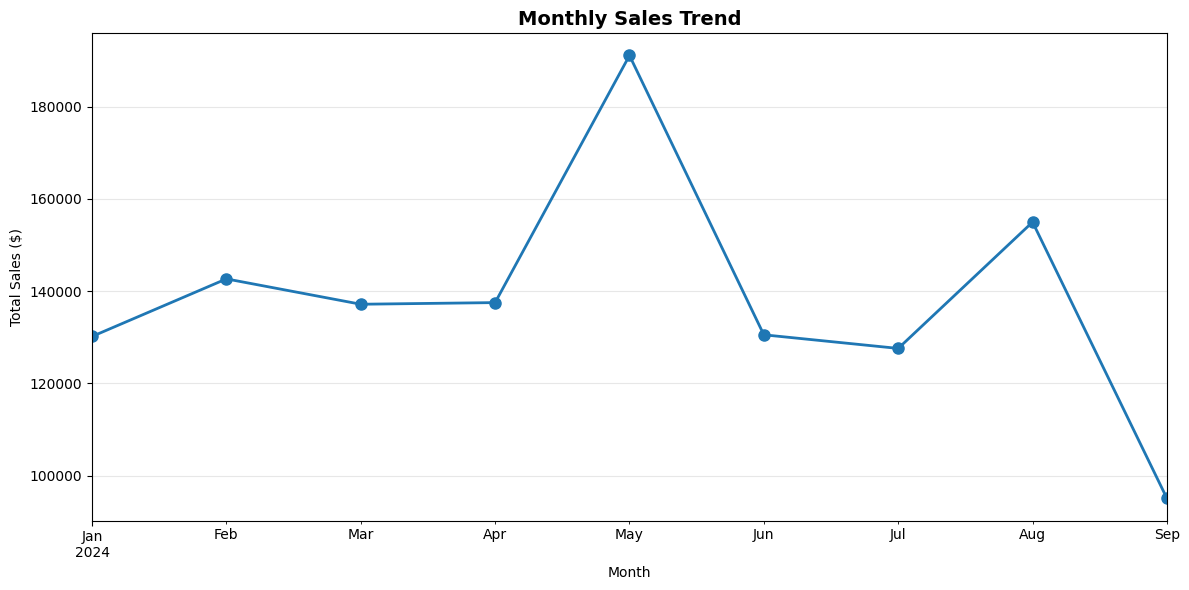

In [16]:
# Visualize monthly trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Sales by day of week
df_sales['day_of_week'] = df_sales['date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pattern = df_sales.groupby('day_of_week')['total_amount'].agg(['sum', 'mean', 'count'])
daily_pattern = daily_pattern.reindex(day_order)

print("Sales pattern by day of week:")
print(daily_pattern)

Sales pattern by day of week:
                   sum         mean  count
day_of_week                               
Monday       190918.38  1289.989054    148
Tuesday      181775.19  1271.155175    143
Wednesday    182620.90  1185.850000    154
Thursday     167259.93  1306.718203    128
Friday       154187.21  1168.084924    132
Saturday     175548.95  1262.942086    139
Sunday       194476.48  1246.644103    156


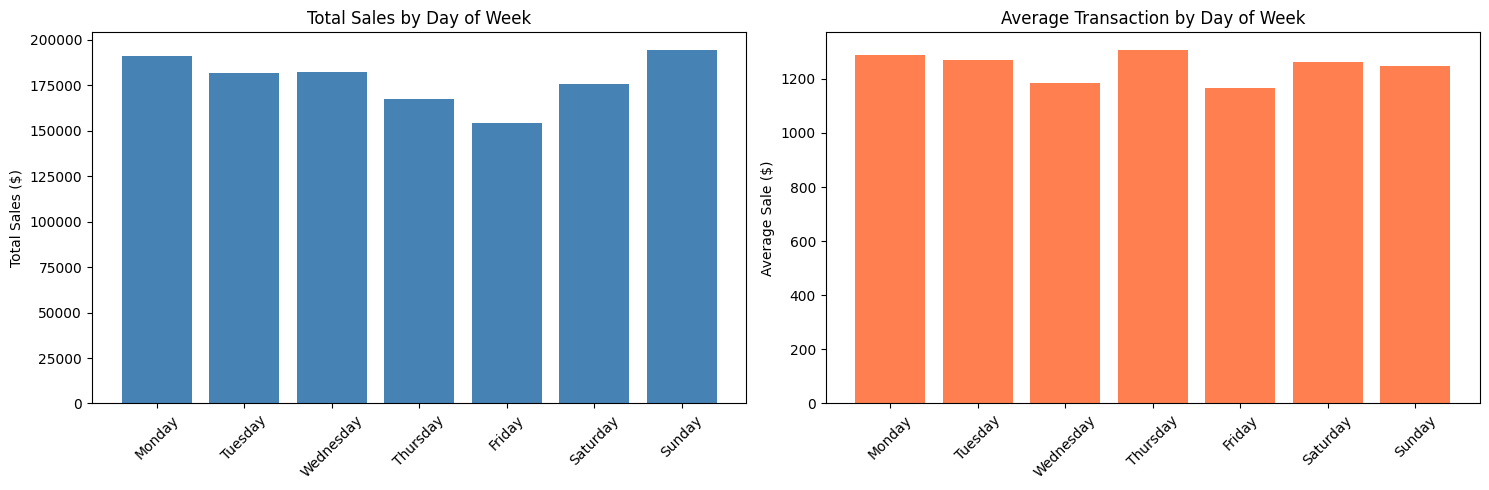

In [18]:
# Visualize weekly pattern
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(daily_pattern.index, daily_pattern['sum'], color='steelblue')
ax1.set_title('Total Sales by Day of Week')
ax1.set_ylabel('Total Sales ($)')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(daily_pattern.index, daily_pattern['mean'], color='coral')
ax2.set_title('Average Transaction by Day of Week')
ax2.set_ylabel('Average Sale ($)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

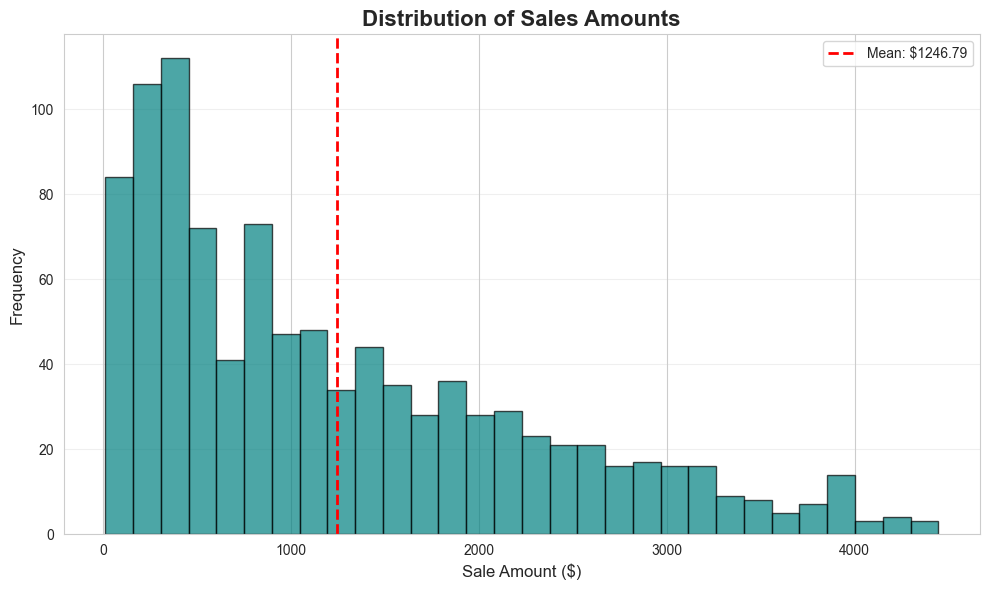

In [ ]:
# Distribution of sales amounts
plt.figure(figsize=(10, 6))
plt.hist(df_sales['total_amount'], bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sales Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Sale Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df_sales['total_amount'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: ${df_sales["total_amount"].mean():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Merging DataFrames

Combine multiple datasets, like VLOOKUP in Excel but much more powerful!

In [19]:
# Preview our datasets
print("Sales data sample:")
print(df_sales[['transaction_id', 'customer_id', 'product_id', 'total_amount']].head())

print("\nCustomer data sample:")
print(df_customers[['customer_id', 'first_name', 'last_name', 'customer_segment']].head())

print("\nProduct data sample:")
print(df_products[['product_id', 'product_name', 'category', 'retail_price']].head())

Sales data sample:
  transaction_id customer_id product_id  total_amount
0      TXN000789    CUST0185     PRD008        335.10
1      TXN000385    CUST0130     PRD011         62.76
2      TXN000408    CUST0164     PRD049       1454.48
3      TXN000128    CUST0142     PRD031       2982.77
4      TXN000838    CUST0173     PRD043        350.57

Customer data sample:
  customer_id first_name last_name customer_segment
0    CUST0001      Karen    Garcia         Standard
1    CUST0002      Karen     Davis         Standard
2    CUST0003      David    Taylor         Standard
3    CUST0004    Richard    Garcia         Standard
4    CUST0005      James     Moore         Standard

Product data sample:
  product_id  product_name     category  retail_price
0     PRD001      Laptop A  Electronics        331.98
1     PRD002      Laptop B  Electronics         74.94
2     PRD003  Smartphone A  Electronics        320.70
3     PRD004  Smartphone B  Electronics        354.85
4     PRD005      Tablet A  El

In [22]:
# Inner join: Merge sales with customer data
sales_with_customers = pd.merge(
    df_sales,
    df_customers[['customer_id', 'first_name', 'last_name', 'customer_segment', 'city']],
    on='customer_id',
    how='inner'
)

print("Sales with customer information:")
sales_with_customers[['transaction_id', 'first_name', 'last_name', 
                             'customer_segment', 'total_amount']].head(10)

Sales with customer information:


,transaction_id,first_name,last_name,customer_segment,total_amount
0,TXN000789,Patricia,Jackson,Basic,335.10
1,TXN000385,Nancy,Garcia,Standard,62.76
2,TXN000408,Thomas,White,Standard,1454.48
3,TXN000128,David,Moore,Basic,2982.77
4,TXN000838,Patricia,Johnson,Standard,350.57
5,TXN000307,Daniel,Davis,Basic,2429.42
6,TXN000116,Lisa,Taylor,Basic,384.16
7,TXN000223,Susan,Miller,Basic,2658.36
8,TXN000714,Karen,Martin,Premium,366.06
9,TXN000444,Barbara,Wilson,Standard,821.87


In [23]:
# Merge with products too
sales_complete = pd.merge(
    sales_with_customers,
    df_products[['product_id', 'product_name', 'category']],
    on='product_id',
    how='left'
)

print("\nComplete sales information:")
sales_complete[['transaction_id', 'first_name', 'last_name', 'product_name', 
                       'category', 'total_amount']].head(10)


Complete sales information:


,transaction_id,first_name,last_name,product_name,category,total_amount
0,TXN000789,Patricia,Jackson,Headphones B,Electronics,335.10
1,TXN000385,Nancy,Garcia,Camera A,Electronics,62.76
2,TXN000408,Thomas,White,NaN,NaN,1454.48
3,TXN000128,David,Moore,Fiction A,Books,2982.77
4,TXN000838,Patricia,Johnson,Accessories A,Clothing,350.57
5,TXN000307,Daniel,Davis,Accessories B,Clothing,2429.42
6,TXN000116,Lisa,Taylor,Non-Fiction A,Books,384.16
7,TXN000223,Susan,Miller,Headphones A,Electronics,2658.36
8,TXN000714,Karen,Martin,Tablet B,Electronics,366.06
9,TXN000444,Barbara,Wilson,Sports Accessories A,Sports,821.87


### Types of Joins

- **Inner**: Only matching records from both tables
- **Left**: All records from left table, matching from right
- **Right**: All records from right table, matching from left
- **Outer**: All records from both tables

In [25]:
# Analysis with merged data: Sales by customer segment
segment_analysis = sales_with_customers.groupby('customer_segment').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'customer_id': 'nunique'
}).round(2)
segment_analysis.columns = ['Total_Sales', 'Avg_Transaction', 'Num_Transactions', 'Num_Customers']

print("Analysis by customer segment:")
segment_analysis

Analysis by customer segment:


,Total_Sales,Avg_Transaction,Num_Transactions,Num_Customers
customer_segment,,,,
Basic,408297.36,1197.35,341,65
Premium,190226.87,1358.76,140,34
Standard,648262.81,1249.06,519,100


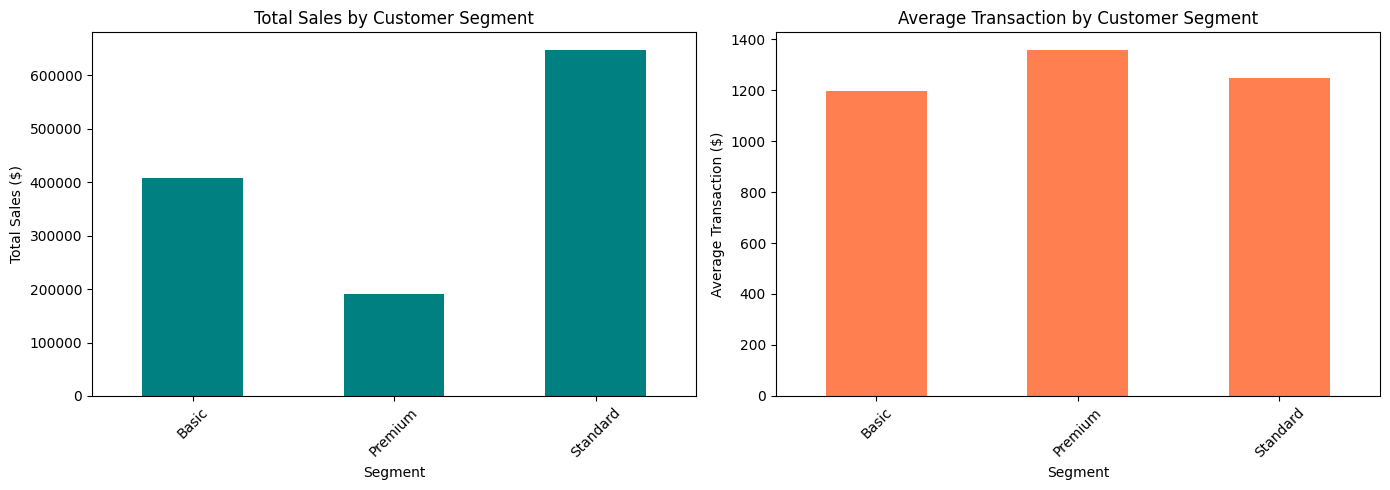

In [26]:
# Visualize segment analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

segment_analysis['Total_Sales'].plot(kind='bar', ax=ax1, color='teal')
ax1.set_title('Total Sales by Customer Segment')
ax1.set_ylabel('Total Sales ($)')
ax1.set_xlabel('Segment')
ax1.tick_params(axis='x', rotation=45)

segment_analysis['Avg_Transaction'].plot(kind='bar', ax=ax2, color='coral')
ax2.set_title('Average Transaction by Customer Segment')
ax2.set_ylabel('Average Transaction ($)')
ax2.set_xlabel('Segment')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [28]:
# Category analysis with complete data
category_analysis = sales_complete.groupby('category').agg({
    'total_amount': 'sum',
    'transaction_id': 'count',
    'customer_id': 'nunique'
}).round(2)
category_analysis.columns = ['Total_Sales', 'Num_Transactions', 'Unique_Customers']
category_analysis = category_analysis.sort_values('Total_Sales', ascending=False)

print("\nSales by product category:")
category_analysis


Sales by product category:


,Total_Sales,Num_Transactions,Unique_Customers
category,,,
Electronics,284449.98,249,145
Sports,240660.87,184,124
Clothing,238355.39,173,116
Home & Garden,222730.43,173,122
Books,164039.33,143,98


## 5. Pivot Tables

Reshape data for analysis - exactly like Excel Pivot Tables!

In [30]:
# Simple pivot table: Sales by region and payment method
pivot_simple = df_sales.pivot_table(
    values='total_amount',
    index='region',
    columns='payment_method',
    aggfunc='sum',
    fill_value=0
).round(2)

print("Sales by region and payment method:")
pivot_simple

Sales by region and payment method:


payment_method,Cash,Credit Card,Debit Card,PayPal,Wire Transfer
region,,,,,
Central,62454.10,95241.71,72650.84,23293.89,10930.16
East,50690.10,100587.20,58824.01,24152.57,8249.46
North,49698.50,100357.88,74487.65,35749.40,5595.62
South,42129.39,75094.66,59229.89,29535.27,6544.30
West,53666.78,115117.39,67570.24,19220.85,5715.18


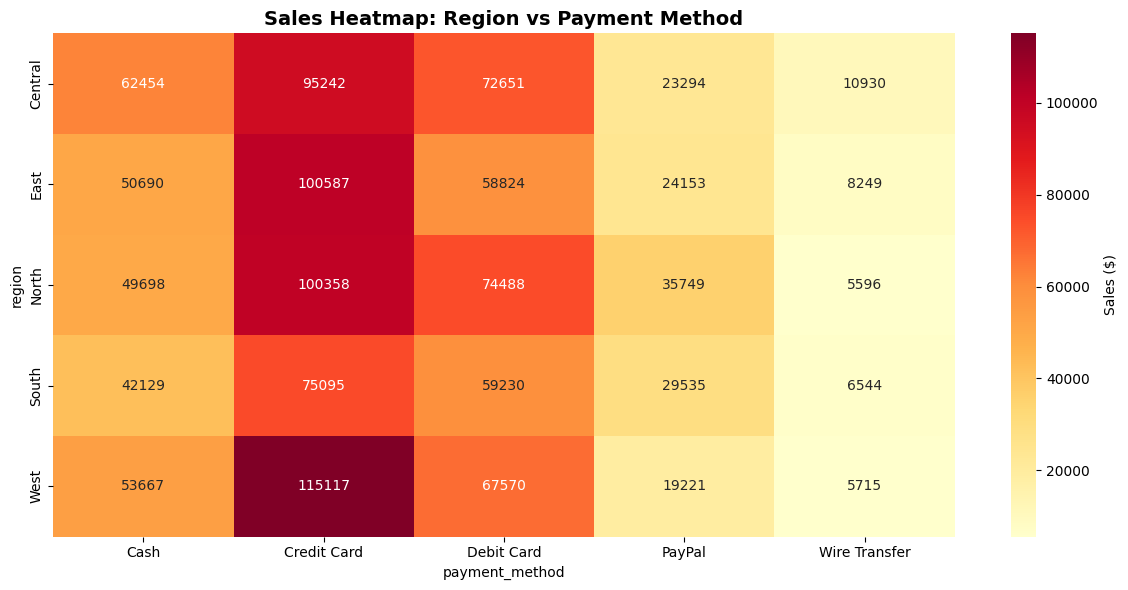

In [31]:
# Visualize pivot table as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_simple, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Sales ($)'})
plt.title('Sales Heatmap: Region vs Payment Method', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [33]:
# Pivot with multiple aggregations
pivot_multi = df_sales.pivot_table(
    values='total_amount',
    index='region',
    columns='payment_method',
    aggfunc=['sum', 'mean', 'count'],
    fill_value=0
).round(2)

print("\nPivot with multiple aggregations:")
pivot_multi


Pivot with multiple aggregations:


sum                                                 \
payment_method      Cash Credit Card Debit Card    PayPal Wire Transfer   
region                                                                    
Central         62454.10    95241.71   72650.84  23293.89      10930.16   
East            50690.10   100587.20   58824.01  24152.57       8249.46   
North           49698.50   100357.88   74487.65  35749.40       5595.62   
South           42129.39    75094.66   59229.89  29535.27       6544.30   
West            53666.78   115117.39   67570.24  19220.85       5715.18   

                   mean                                               count  \
payment_method     Cash Credit Card Debit Card   PayPal Wire Transfer  Cash   
region                                                                        
Central         1643.53     1236.91    1297.34  1058.81       1366.27    38   
East            1101.96     1197.47    1251.57  1420.74        824.95    46   
North           1155.78     1454.46    1262.50  1232.74        932.60    43   
South           1138.63     1155.30    1377.44  1284.14        934.90    37   
West            1341.67     1265.03    1145.26   915.28       1905.06    40   

                                                            
payment_method Credit Card Debit Card PayPal Wire Transfer  
region                                                      
Central                 77         56     22             8  
East                    84         47     17            10  
North                   69         59     29             6  
South                   65         43     23             7  
West                    91         59     21             3

In [35]:
# Time-based pivot table
df_sales['month'] = df_sales['date'].dt.month
pivot_time = df_sales.pivot_table(
    values='total_amount',
    index='month',
    columns='region',
    aggfunc='sum',
    fill_value=0
).round(2)

print("\nMonthly sales by region:")
pivot_time


Monthly sales by region:


region,Central,East,North,South,West
month,,,,,
1,31070.15,26723.66,23199.60,19072.42,30105.22
2,31678.48,16239.50,32869.95,18887.97,42986.89
3,38484.57,23934.01,34850.01,19695.90,20197.04
4,23966.65,28730.15,24999.31,26069.16,33752.85
5,33825.99,37599.24,46491.73,36016.48,37201.69
6,17028.28,38623.28,20997.83,24416.21,29465.57
7,32728.68,20879.57,26317.77,18386.68,29263.96
8,43089.34,27306.03,33855.79,30380.29,20358.16
9,12698.56,22467.90,22307.06,19608.40,17959.06


<Figure size 1400x600 with 0 Axes>

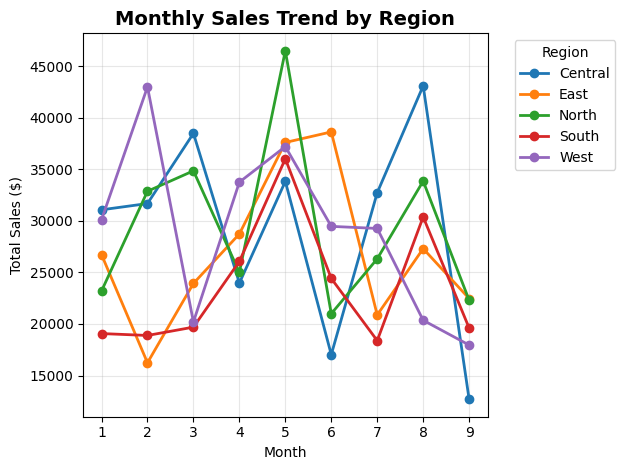

In [36]:
# Visualize time pivot
plt.figure(figsize=(14, 6))
pivot_time.plot(kind='line', marker='o', linewidth=2)
plt.title('Monthly Sales Trend by Region', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Cross-Tabulation

Count frequency of combinations.

In [38]:
# Cross-tab: Count of transactions by region and payment method
crosstab = pd.crosstab(
    df_sales['region'],
    df_sales['payment_method'],
    margins=True,  # Add row and column totals
    margins_name='Total'
)

print("Transaction counts:")
crosstab

Transaction counts:


payment_method,Cash,Credit Card,Debit Card,PayPal,Wire Transfer,Total
region,,,,,,
Central,38,77,56,22,8,201
East,46,84,47,17,10,204
North,43,69,59,29,6,206
South,37,65,43,23,7,175
West,40,91,59,21,3,214
Total,204,386,264,112,34,1000


In [40]:
# Cross-tab with percentages
crosstab_pct = pd.crosstab(
    df_sales['region'],
    df_sales['payment_method'],
    normalize='all'  # 'all', 'index', or 'columns'
) * 100

print("\nTransaction distribution (%):")
crosstab_pct.round(2)


Transaction distribution (%):


payment_method,Cash,Credit Card,Debit Card,PayPal,Wire Transfer
region,,,,,
Central,3.8,7.7,5.6,2.2,0.8
East,4.6,8.4,4.7,1.7,1.0
North,4.3,6.9,5.9,2.9,0.6
South,3.7,6.5,4.3,2.3,0.7
West,4.0,9.1,5.9,2.1,0.3


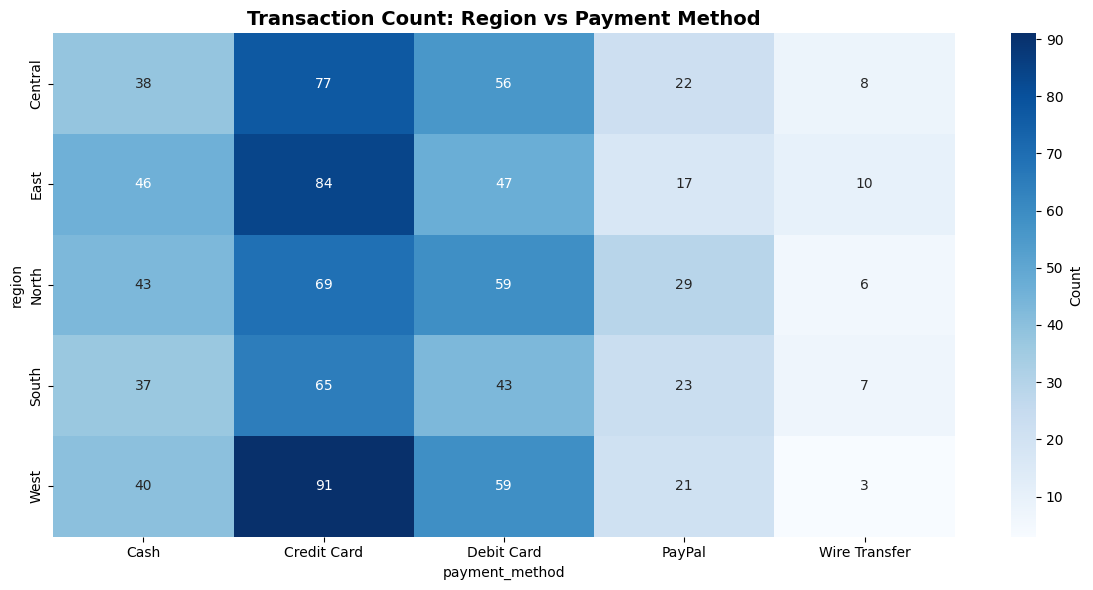

In [41]:
# Visualize cross-tab
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab.iloc[:-1, :-1], annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Count'})
plt.title('Transaction Count: Region vs Payment Method', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 7. Reshaping Data

In [43]:
# Create sample wide data
wide_data = df_sales.groupby(['region', 'month'])['total_amount'].sum().unstack(fill_value=0)
print("Wide format:")
wide_data

Wide format:


month,1,2,3,4,5,6,7,8,9
region,,,,,,,,,
Central,31070.15,31678.48,38484.57,23966.65,33825.99,17028.28,32728.68,43089.34,12698.56
East,26723.66,16239.50,23934.01,28730.15,37599.24,38623.28,20879.57,27306.03,22467.90
North,23199.60,32869.95,34850.01,24999.31,46491.73,20997.83,26317.77,33855.79,22307.06
South,19072.42,18887.97,19695.90,26069.16,36016.48,24416.21,18386.68,30380.29,19608.40
West,30105.22,42986.89,20197.04,33752.85,37201.69,29465.57,29263.96,20358.16,17959.06


In [45]:
# Melt: Wide to long format
long_data = wide_data.reset_index().melt(
    id_vars='region',
    var_name='month',
    value_name='sales'
)
print("\nLong format:")
long_data.head(15)


Long format:


,region,month,sales
0,Central,1,31070.15
1,East,1,26723.66
2,North,1,23199.60
3,South,1,19072.42
4,West,1,30105.22
5,Central,2,31678.48
6,East,2,16239.50
7,North,2,32869.95
8,South,2,18887.97
9,West,2,42986.89


In [48]:
# Stack and unstack
# Stack: Move column index to row index
stacked = pivot_simple.stack()
print("Stacked:")
stacked.head(10)

Stacked:


region   payment_method
Central  Cash               62454.10
         Credit Card        95241.71
         Debit Card         72650.84
         PayPal             23293.89
         Wire Transfer      10930.16
East     Cash               50690.10
         Credit Card       100587.20
         Debit Card         58824.01
         PayPal             24152.57
         Wire Transfer       8249.46
dtype: float64

In [49]:
# Unstack: Move row index to column index
unstacked = stacked.unstack()
print("\nUnstacked (back to pivot):")
unstacked


Unstacked (back to pivot):


payment_method,Cash,Credit Card,Debit Card,PayPal,Wire Transfer
region,,,,,
Central,62454.10,95241.71,72650.84,23293.89,10930.16
East,50690.10,100587.20,58824.01,24152.57,8249.46
North,49698.50,100357.88,74487.65,35749.40,5595.62
South,42129.39,75094.66,59229.89,29535.27,6544.30
West,53666.78,115117.39,67570.24,19220.85,5715.18


## Practice Exercise

Comprehensive analysis combining all techniques!

In [51]:
# Exercise: Top performing sales reps analysis

# Step 1: Merge sales with customer and product data
complete_data = pd.merge(
    df_sales,
    df_customers[['customer_id', 'customer_segment']],
    on='customer_id',
    how='left'
)

complete_data = pd.merge(
    complete_data,
    df_products[['product_id', 'category']],
    on='product_id',
    how='left'
)

# Step 2: Analyze by sales rep
rep_performance = complete_data.groupby('sales_rep').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'customer_id': 'nunique',
    'transaction_id': 'count'
}).round(2)
rep_performance.columns = ['Total_Sales', 'Avg_Transaction', 'Num_Transactions', 
                            'Unique_Customers', 'Total_Transactions']
rep_performance = rep_performance.sort_values('Total_Sales', ascending=False)

print("Sales representative performance:")
rep_performance

Sales representative performance:


,Total_Sales,Avg_Transaction,Num_Transactions,Unique_Customers,Total_Transactions
sales_rep,,,,,
John Smith,179529.26,1282.35,140,101,140
Sarah Wilson,170948.05,1304.95,131,94,131
Jennifer Davis,157553.11,1302.09,121,90,121
David Lee,157357.05,1148.59,137,108,137
Mary Johnson,152305.20,1228.27,124,88,124
Robert Garcia,146200.35,1329.09,110,84,110
Lisa Martinez,145696.74,1245.27,117,96,117
Michael Brown,137197.28,1143.31,120,90,120


In [53]:
# Step 3: Category breakdown per rep
rep_category = complete_data.pivot_table(
    values='total_amount',
    index='sales_rep',
    columns='category',
    aggfunc='sum',
    fill_value=0
).round(2)

print("\nSales by rep and category:")
rep_category


Sales by rep and category:


category,Books,Clothing,Electronics,Home & Garden,Sports
sales_rep,,,,,
David Lee,25791.72,33464.21,35764.03,21571.46,28095.30
Jennifer Davis,16689.08,30104.71,31195.65,33675.05,27801.56
John Smith,21460.67,36362.89,34108.31,32629.10,37792.29
Lisa Martinez,18275.19,37963.03,36134.92,16189.02,23825.34
Mary Johnson,22004.90,21570.04,36545.53,29062.38,28714.13
Michael Brown,21977.40,20511.35,26709.30,26204.14,35422.77
Robert Garcia,24540.71,33807.96,23907.99,29646.90,26661.78
Sarah Wilson,13299.66,24571.20,60084.25,33752.38,32347.70


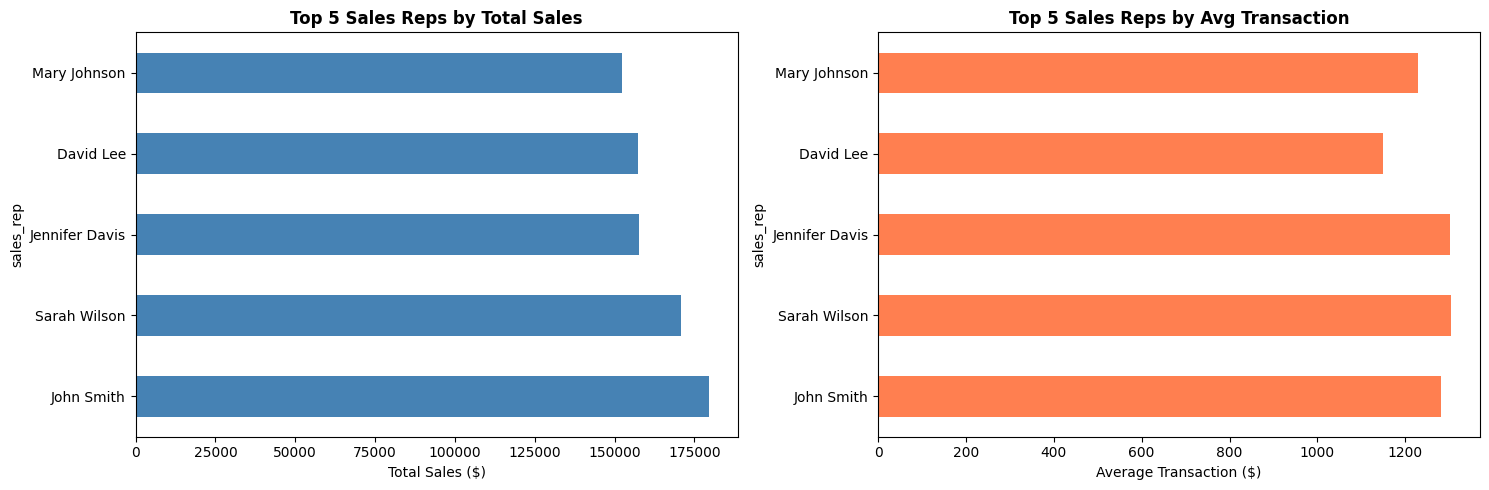

In [54]:
# Step 4: Visualize top performers
top_reps = rep_performance.head(5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

top_reps['Total_Sales'].plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Top 5 Sales Reps by Total Sales', fontweight='bold')
ax1.set_xlabel('Total Sales ($)')

top_reps['Avg_Transaction'].plot(kind='barh', ax=ax2, color='coral')
ax2.set_title('Top 5 Sales Reps by Avg Transaction', fontweight='bold')
ax2.set_xlabel('Average Transaction ($)')

plt.tight_layout()
plt.show()

## Summary

In this module, you learned:

✓ **GroupBy**: Split-apply-combine pattern for aggregations  
✓ **Multiple Aggregations**: Apply multiple functions at once  
✓ **Transform**: Add group statistics to original DataFrame  
✓ **Merging**: Combine multiple datasets (like VLOOKUP++)  
✓ **Join Types**: Inner, left, right, and outer joins  
✓ **Pivot Tables**: Reshape data for analysis  
✓ **Cross-Tabulation**: Count combinations of categorical variables  
✓ **Reshaping**: Melt, stack, and unstack operations

### Quick Reference

```python
# GroupBy
df.groupby('column')['value'].sum()
df.groupby('col').agg(['sum', 'mean', 'count'])

# Merge
pd.merge(df1, df2, on='key', how='inner')

# Pivot Table
df.pivot_table(values='val', index='row', columns='col', aggfunc='sum')

# Cross-tab
pd.crosstab(df['col1'], df['col2'])
```

Next up: **Module 5 - Data Cleaning & Transformation**!